# Stacking

We will use `Stacking` method to ensemble several classifiers for a regression problem.  
The dataset we are going to use is `Cars`, we will execute the data transformation we done in previous notebook on the dataset.  
**We will predict the price of cars using the method above.**

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [455]:
df = pd.read_csv("./data/cars.csv")

For recalling the dataset:

In [456]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [457]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [459]:
df.isnull().any().any()

False

## Data transformation

In [460]:
cars = df.copy()

The `CarName` column

In [461]:
cars['CarName'] = cars['CarName'].apply(lambda x: x.split()[0])
cars.rename(columns={"CarName": "Company"}, inplace=True)

Fix companies names:

In [462]:
cars['Company'].replace('maxda', 'mazda', inplace=True)
cars['Company'].replace('porcshce', 'porsche', inplace=True)
cars['Company'].replace('Nissan', 'nissan', inplace=True)
cars['Company'].replace('toyouta', 'toyota', inplace=True)
cars['Company'].replace('vokswagen', 'volkswagen', inplace=True)
cars['Company'].replace('vw', 'volkswagen', inplace=True)

Features for consideration:

In [463]:
cars_df = cars[['fueltype', 'carbody', 'enginesize', 'horsepower', 
                'cylindernumber', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'price']]

Dummies features transformation function:

In [464]:
def transform_column(_cars, columns_names):
    for column_name in columns_names:
        temp = pd.get_dummies(_cars[column_name], drop_first = True)
        _cars = pd.concat([_cars, temp], axis = 1)
        _cars.drop([column_name], axis = 1, inplace = True)
    return _cars

Features for dummies:

In [465]:
features_to_transform = ['fueltype', 'carbody', 'cylindernumber', 'enginetype']
cars_df = transform_column(cars_df, features_to_transform)

**Data shape after transformation:**

In [466]:
data_shape = cars_df.shape
data_shape

(205, 23)

**Our new columns:**

In [467]:
cars_df.columns

Index(['enginesize', 'horsepower', 'carlength', 'carwidth', 'curbweight',
       'price', 'gas', 'hardtop', 'hatchback', 'sedan', 'wagon', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor'],
      dtype='object')

In [468]:
selected_features = ['enginesize', 'horsepower', 'carwidth', 'curbweight', 'five','four', 'six', 'twelve', 'dohcv', 'ohcv', 'price']
cars_df = cars_df[selected_features]

## Prepare for training

In [469]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trans = ['enginesize', 'horsepower', 'carwidth', 'curbweight', 'price']
cars_df[trans] = scaler.fit_transform(cars_df[trans])

In [470]:
y = cars_df.pop("price")
X = cars_df

In [471]:
y.head()

0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
Name: price, dtype: float64

In [445]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

### Models scores

In [447]:
# [("model1", mse_score1, r2_score1), ("model2", mse_score2, r2_score2), ...]
models_scores = []

### Random Forest optimization

In [448]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   53.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [449]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

We got the following params as the best estimator hyperparamaters:
1. `n_estimators`: 400
2. `min_samples_split`: 2
3. `min_samples_leaf`: 1
4. `max_features`: sqrt
5. `max_depth`: None
6. `bootstrap`: False

In [477]:
best_rf = rf_random.best_estimator_

In [478]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, name, test_features, test_labels):
    if name == "xgb":
        test_features = xgb.DMatrix(test_features, label=test_labels)
    predictions = model.predict(test_features)
    mse = mean_squared_error(predictions,test_labels)
    print('Model Performance: '+name)
    r2 = r2_score(test_labels, predictions)
    print("R2 score: " + str(r2))
    print("MSE: {}".format(mse))
    return predictions, mse, r2

In [479]:
preds, mse, r2 = evaluate(best_rf, "Random Forest", X_test, y_test)

Model Performance: Random Forest
R2 score: 0.9270822407443072
MSE: 0.0032301634683815517


In [480]:
models_scores.append(("Random_Forest", mse, r2))

### AdaBoostRegressor Optimization

In [481]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
loss = ['linear', 'square', 'exponential']
learning_rate = [0.01,0.05,0.1,0.3,1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss': loss}

ada = AdaBoostRegressor()
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
ada_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   43.5s finished


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [482]:
ada_random.best_params_

{'n_estimators': 800, 'loss': 'exponential', 'learning_rate': 1}

We got the following params as the best estimator hyperparamaters:
1. `n_estimators`: 800
2. `loss`: exponential
3. `learning_rate`: 1

In [485]:
best_ada = ada_random.best_estimator_

In [486]:
preds, mse, r2 = evaluate(best_ada,"AdaBoost", X_test, y_test)

Model Performance: AdaBoost
R2 score: 0.9220429809639216
MSE: 0.0034533962311054777


In [487]:
models_scores.append(("AdaBoost", mse, r2))

### LinearSVR optimization

In [488]:
random_grid = {"C": [0.5, 1.0, 2.0, 3.0], "loss": ["squared_epsilon_insensitive", "epsilon_insensitive"]}
lsvr = LinearSVR()
lsvr_random = RandomizedSearchCV(estimator = lsvr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
lsvr_random.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished


RandomizedSearchCV(cv=3, estimator=LinearSVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.5, 1.0, 2.0, 3.0],
                                        'loss': ['squared_epsilon_insensitive',
                                                 'epsilon_insensitive']},
                   random_state=42, verbose=2)

In [489]:
lsvr_random.best_params_

{'loss': 'squared_epsilon_insensitive', 'C': 0.5}

We got the following params as the best estimator hyperparamaters:
1. `C`: 0.5
2. `loss`: squared_epsilon_insensitive

In [516]:
best_lsvr = lsvr_random.best_estimator_

In [517]:
preds, mse, r2 = evaluate(best_lsvr,"LinearSVR", X_test, y_test)

Model Performance: LinearSVR
R2 score: 0.8649956615673564
MSE: 0.005980519513071835


In [518]:
models_scores.append(("LinearSVR", mse, r2))

### LinearRegression fit

In [560]:
best_lr = LinearRegression().fit(X_train, y_train)

In [561]:
preds, mse, r2 = evaluate(best_lr,"LinearRegression", X_test, y_test)

Model Performance: LinearRegression
R2 score: 0.8509595194781296
MSE: 0.006602302654468812


In [562]:
models_scores.append(("LinearRegression", mse, r2))

## Compare the models

In [563]:
models_scores

[('Random_Forest', 0.0032301634683815517, 0.9270822407443072),
 ('AdaBoost', 0.0034533962311054777, 0.9220429809639216),
 ('LinearSVR', 0.005980519513071835, 0.8649956615673564),
 ('LinearRegression', 0.006602302654468812, 0.8509595194781296)]

In [564]:
models_names = [x[0] for x in models_scores]
mses = [x[1] for x in models_scores]
r2s = [x[2] for x in models_scores]

models_scores_df = pd.DataFrame({"Model": models_names, "MSE": mses, "R2": r2s})

In [566]:
names = models_scores_df['Model']
scores = models_scores_df[['MSE', 'R2']]

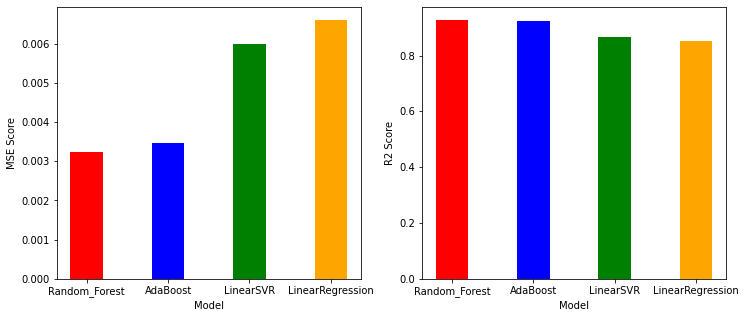

In [575]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.bar(range(len(scores['MSE'])), scores['MSE'], 0.4, color=['r', 'b', 'g', 'orange'])
plt.xticks(list(range(len(names))), names)
plt.ylabel("MSE Score")
plt.xlabel("Model")

plt.subplot(122)
plt.bar(range(len(scores['R2'])), scores['R2'], 0.4, color=['r', 'b', 'g', 'orange'])
plt.xticks(list(range(len(names))), names)
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.show()

In [576]:
models_scores_df

,Model,MSE,R2
0,Random_Forest,0.003230,0.927082
1,AdaBoost,0.003453,0.922043
2,LinearSVR,0.005981,0.864996
3,LinearRegression,0.006602,0.850960


We can see that the RandomForest is the the model with the least MSE and the best R2 score.

### Build the stack model

In [586]:
def get_models():
    models = {}
    models['lr'] = best_lr
    models['rf'] = best_rf
    models['ada'] = best_ada
    models['lsvr'] = best_lsvr
    return models

In [601]:
def get_pre_estimator():
    return best_lsvr

In [602]:
def stack_models(models):
    pre_estimator = get_pre_estimator()
    model = StackingRegressor(estimators = models, final_estimator = pre_estimator)
    return model

In [603]:
models = get_models()

In [604]:
models_tuples = [(k,v) for k,v in models.items()]

In [605]:
stacked_model = stack_models(models_tuples)
stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(bootstrap=False,
                                                     max_features='sqrt',
                                                     n_estimators=400)),
                              ('ada',
                               AdaBoostRegressor(learning_rate=1,
                                                 loss='exponential',
                                                 n_estimators=800)),
                              ('lsvr',
                               LinearSVR(C=1,
                                         loss='squared_epsilon_insensitive'))],
                  final_estimator=LinearSVR(C=1,
                                            loss='squared_epsilon_insensitive'))

In [606]:
models['stacking'] = stacked_model

In [609]:
preds, mse, r2 = evaluate(stacked_model, 'StackModel', X_test, y_test)

Model Performance: StackModel
R2 score: 0.9365715991763233
MSE: 0.0028097970273614427


In [622]:
models_scores_df = models_scores_df.append(pd.DataFrame({"Model": ['StackModel'], "MSE": [mse], "R2": [r2]}))

### Compare with other models

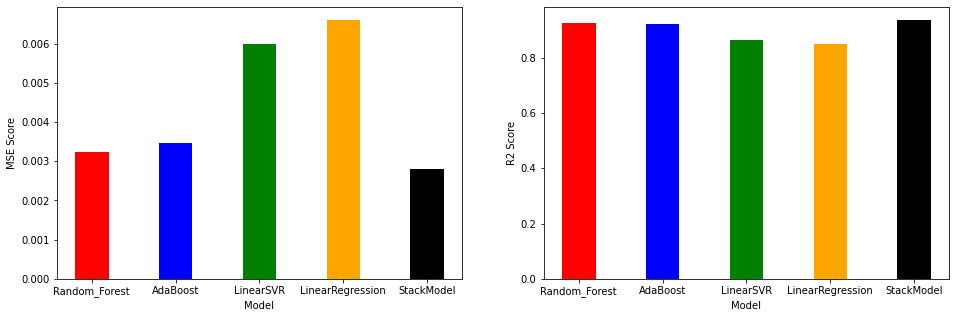

In [627]:
names = models_scores_df['Model']

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.bar(range(len(models_scores_df['MSE'])), models_scores_df['MSE'], 0.4, color=['r', 'b', 'g', 'orange', 'black'])
plt.xticks(list(range(len(names))), names)
plt.ylabel("MSE Score")
plt.xlabel("Model")

plt.subplot(122)
plt.bar(range(len(models_scores_df['R2'])), models_scores_df['R2'], 0.4, color=['r', 'b', 'g', 'orange', 'black'])
plt.xticks(list(range(len(names))), names)
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.show()

In [625]:
models_scores_df

,Model,MSE,R2
0,Random_Forest,0.003230,0.927082
1,AdaBoost,0.003453,0.922043
2,LinearSVR,0.005981,0.864996
3,LinearRegression,0.006602,0.850960
0,StackModel,0.002810,0.936572


We have constructed a stacked model that outperform the other models:  
1. `MSE` - **0.00281**
2. `R2 Score` - **0.936**